In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Problem is classification Problem

In [8]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.225,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.000,D,S


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.shape

(891, 12)

In [13]:
#checking null values

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# we have to treat null values 
#simple imputer method for target variable Embarked and feature variable Cabin as categorical data
#Mean method for variable Age as integer data

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Age']=df['Age'].fillna((df['Age'].mean()))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [18]:
df=df.drop(["Name"],axis=1)
df                                                                       #As Name is nominal data so we can drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Now no null values is present , draw Heatmap of Null Values

In [21]:
df.shape

(891, 11)

<AxesSubplot:>

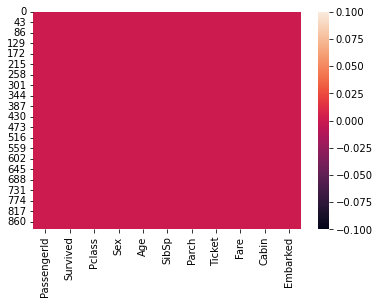

In [22]:
sns.heatmap(df.isnull())

In [23]:
#Statistical Summary

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#observations > difference in 3rd quartile and max shows outliers are present
#mean>median-> data is right skewed and mean<median -> data is left skewed

In [26]:
#want to describe along categorical data

In [27]:
df.describe(include=['O'])

,Sex,Ticket,Cabin,Embarked
count,891,891,891,891
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,691,646


In [28]:
#Target Variable

In [29]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
#Data balancing needed as classification problem . Either we can do by SMOTE technique or Normalization Technique
#Normalization Done because SMOTE technique was taking error

In [31]:
df['Embarked'].value_counts(normalize=True)*100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [32]:
# Now DATA is BALANCED

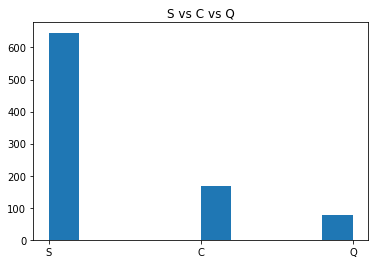

In [33]:
df['Embarked'].hist(grid=False)
plt.title("S vs C vs Q")
plt.show()

In [34]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

EDA - 
univariate analysis 

In [35]:
#checking distribution of curve

<AxesSubplot:xlabel='Survived', ylabel='Density'>

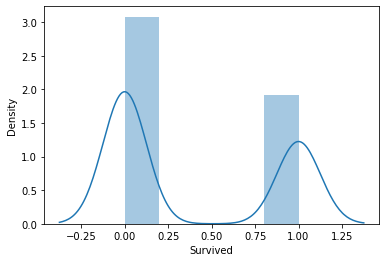

In [36]:
sns.distplot(df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

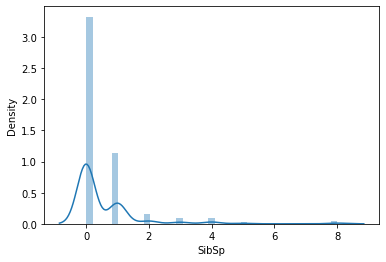

In [37]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

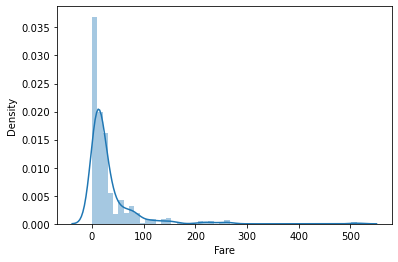

In [38]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

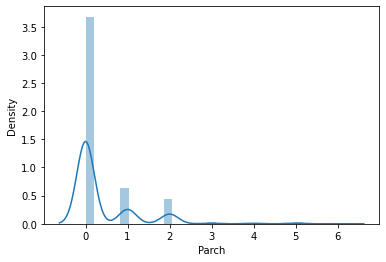

In [39]:
sns.distplot(df['Parch'])

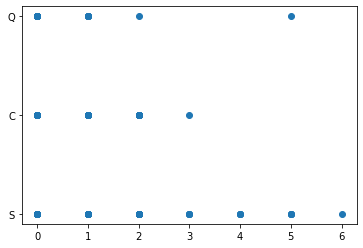

In [40]:
plt.scatter(df['Parch'],df['Embarked'])

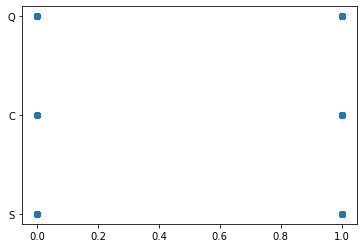

In [41]:
plt.scatter(df['Survived'],df['Embarked'])

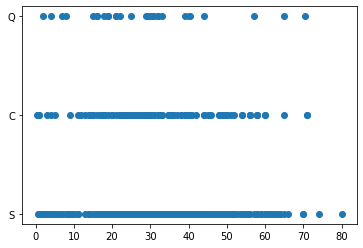

In [42]:
plt.scatter(df['Age'],df['Embarked'])

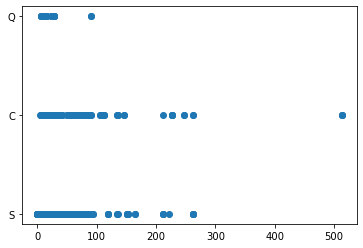

In [43]:
plt.scatter(df['Fare'],df['Embarked'])

In [44]:
#We have checked feature columns with target column

In [45]:
#Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [47]:
df["Embarked"]=LE.fit_transform(df["Embarked"])
df["Sex"]=LE.fit_transform(df["Sex"])
df["Ticket"]=LE.fit_transform(df["Ticket"])
df["Cabin"]=LE.fit_transform(df["Cabin"])

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,1,26.000000,0,0,8,30.0000,60,0


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [49]:
#univariate analysis

<AxesSubplot:xlabel='Survived', ylabel='Density'>

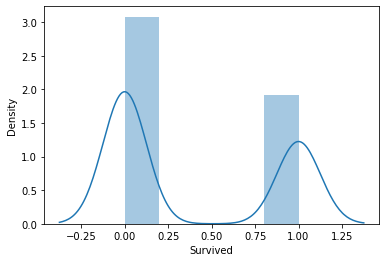

In [50]:
sns.distplot(df['Survived'])


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

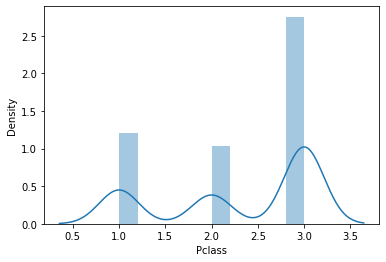

In [51]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

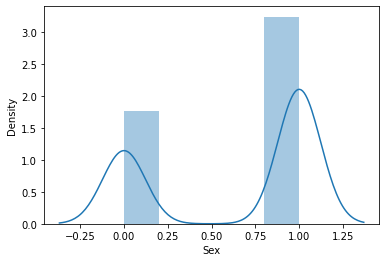

In [52]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

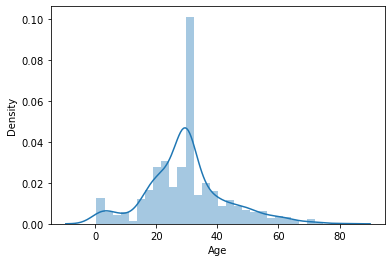

In [53]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

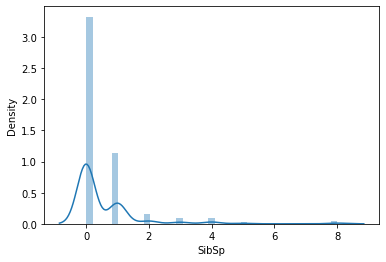

In [54]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

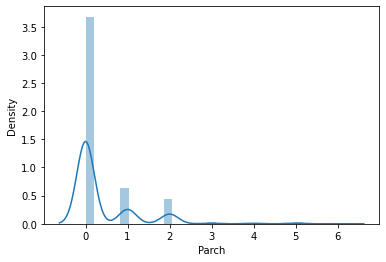

In [55]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

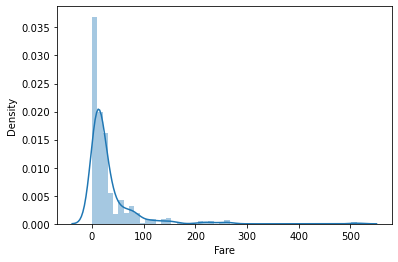

In [56]:
sns.distplot(df['Fare'])

In [57]:
#Bivariate analysis

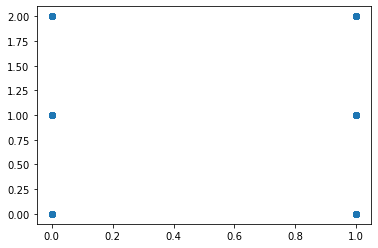

In [58]:
plt.scatter(df['Survived'],df['Embarked'])

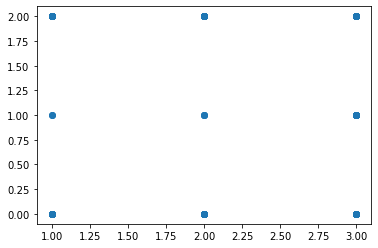

In [59]:
plt.scatter(df['Pclass'],df['Embarked'])

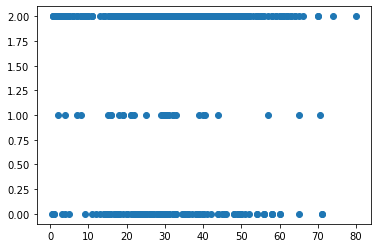

In [60]:
plt.scatter(df['Age'],df['Embarked'])

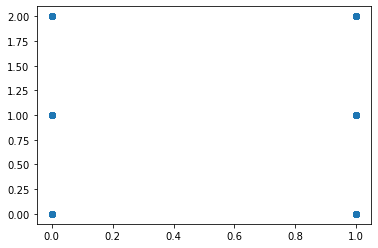

In [61]:
plt.scatter(df['Sex'],df['Embarked'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25db83da040>,
 'caps': [<matplotlib.lines.Line2D at 0x25db83da5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25db83c7d30>],
 'medians': [<matplotlib.lines.Line2D at 0x25db83dab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25db83dae50>],
 'means': []}

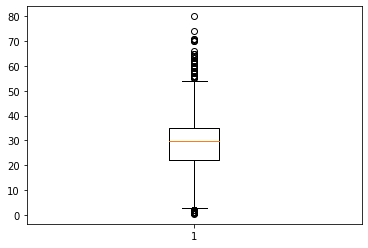

In [62]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25db8443220>,
 'caps': [<matplotlib.lines.Line2D at 0x25db84437c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25db8432f10>],
 'medians': [<matplotlib.lines.Line2D at 0x25db8443d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25db8451070>],
 'means': []}

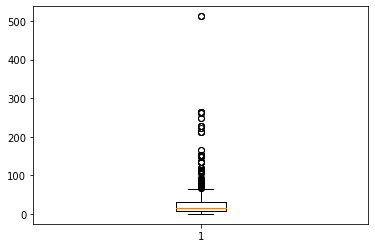

In [63]:
plt.boxplot(df['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25db9477280>,
 'caps': [<matplotlib.lines.Line2D at 0x25db9477850>,
 'boxes': [<matplotlib.lines.Line2D at 0x25db9466f70>],
 'medians': [<matplotlib.lines.Line2D at 0x25db9477df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25db9484100>],
 'means': []}

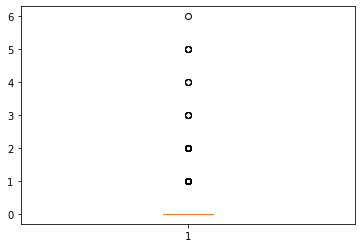

In [64]:
plt.boxplot(df['Parch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25db94d5880>,
 'caps': [<matplotlib.lines.Line2D at 0x25db94d5e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x25db94d55b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25db94e4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x25db94e46d0>],
 'means': []}

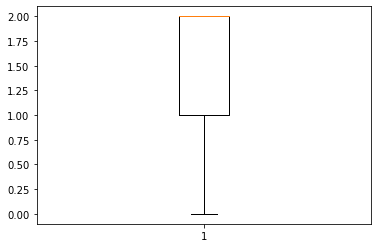

In [65]:
plt.boxplot(df['Embarked'])

In [66]:
#Multivariate Analysis
#check data distribution among all coulmns

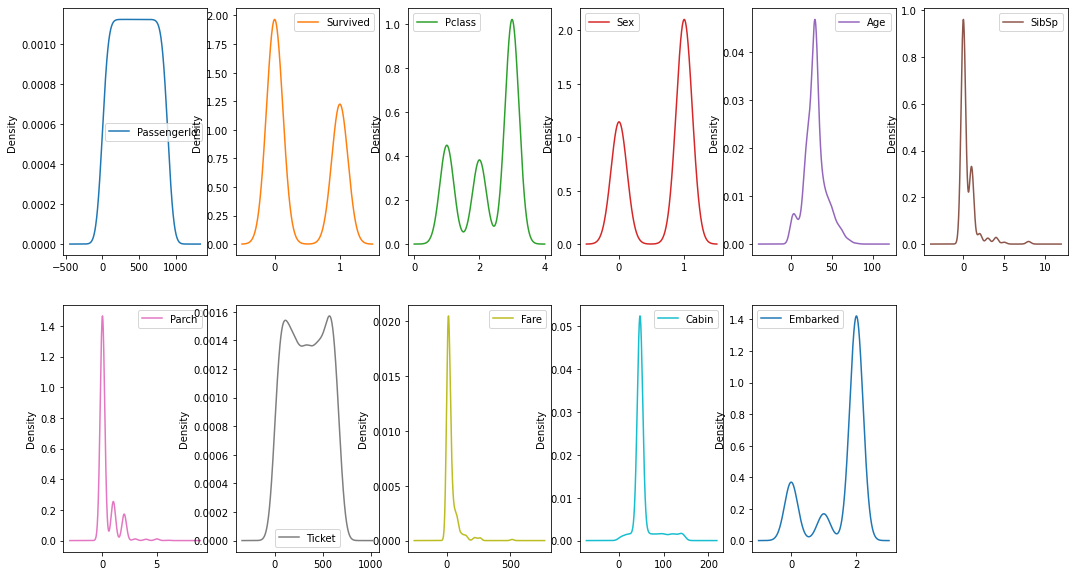

In [67]:
df.plot(kind='density',subplots=True,layout=(2,6),sharex=False,legend=True,figsize=(18,10))
plt.show()

In [68]:
#Observation : We can see outliers and skewness is present in data

In [69]:
#Check Correlation

In [70]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,-0.018086,0.175690,-0.248495,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804


In [71]:
df=df.drop("Fare",axis=1)                                                    #high negative correlated with outlier and skewness
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,47,2
1,2,1,1,0,38.000000,1,0,596,81,0
2,3,1,3,0,26.000000,0,0,669,47,2
3,4,1,1,0,35.000000,1,0,49,55,2
4,5,0,3,1,35.000000,0,0,472,47,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,47,2
887,888,1,1,0,19.000000,0,0,14,30,2
888,889,0,3,0,29.699118,1,2,675,47,2
889,890,1,1,1,26.000000,0,0,8,60,0


In [72]:
#Removing Outliers
#z-score Technique

In [73]:
x=df.iloc[:,:-1]
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin
0,1,0,3,1,22.000000,1,0,523,47
1,2,1,1,0,38.000000,1,0,596,81
2,3,1,3,0,26.000000,0,0,669,47
3,4,1,1,0,35.000000,1,0,49,55
4,5,0,3,1,35.000000,0,0,472,47
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,47
887,888,1,1,0,19.000000,0,0,14,30
888,889,0,3,0,29.699118,1,2,675,47
889,890,1,1,1,26.000000,0,0,8,60


In [74]:
y=df.iloc[:,-1]
y                                                                    #As Name is nominal data so we can drop

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [75]:
from scipy.stats import zscore
import numpy as np

In [76]:
z=np.abs(zscore(x))
z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin
0,1.730108,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.918966,0.281881
1,1.726220,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,1.282625,1.161545
2,1.722332,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,1.646283,0.281881
3,1.718444,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,1.442322,0.057748
4,1.714556,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.664904,0.281881
...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,1.183277,0.281881
887,1.718444,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,1.616678,1.003594
888,1.722332,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,1.676173,0.281881
889,1.726220,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,1.646568,0.270017


In [77]:
z.shape

(891, 9)

In [78]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  50,  59,  66,  68,  71,  75,  86,  96,
       116, 119, 128, 148, 159, 164, 167, 171, 180, 182, 183, 193, 201,
       205, 233, 251, 261, 262, 266, 278, 309, 324, 337, 339, 340, 345,
       360, 370, 386, 394, 434, 437, 438, 456, 462, 480, 493, 516, 541,
       542, 558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 683,
       686, 699, 715, 724, 736, 745, 772, 774, 776, 787, 792, 809, 813,
       824, 835, 846, 850, 851, 858, 863, 885], dtype=int64), array([8, 8, 6, 5, 6, 5, 5, 8, 5, 5, 8, 6, 4, 4, 5, 8, 8, 5, 5, 6, 5, 5,
       5, 8, 8, 5, 8, 5, 8, 5, 8, 5, 5, 8, 5, 8, 8, 8, 8, 6, 8, 5, 8, 8,
       6, 6, 8, 8, 5, 4, 8, 5, 5, 8, 6, 8, 8, 6, 8, 4, 6, 8, 4, 6, 5, 5,
       8, 8, 8, 6, 4, 8, 6, 8, 5, 5, 8, 5, 5, 8, 5, 5, 4, 6, 5, 6],
      dtype=int64))


In [79]:
#Removing Outliers from x

In [80]:
df1=df[(z<3).all(axis=1)]
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,47,2
1,2,1,1,0,38.000000,1,0,596,81,0
2,3,1,3,0,26.000000,0,0,669,47,2
3,4,1,1,0,35.000000,1,0,49,55,2
4,5,0,3,1,35.000000,0,0,472,47,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,47,2
887,888,1,1,0,19.000000,0,0,14,30,2
888,889,0,3,0,29.699118,1,2,675,47,2
889,890,1,1,1,26.000000,0,0,8,60,0


In [81]:
df1.shape

(805, 10)

In [82]:
#Percentage Data Loss

loss_percent=(891-805)/891*100
print(loss_percent)

9.652076318742985


In [141]:
#Outliers removed
#transform data to remove skewness

In [84]:
x=df1.iloc[:,0:-1]
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin
0,1,0,3,1,22.000000,1,0,523,47
1,2,1,1,0,38.000000,1,0,596,81
2,3,1,3,0,26.000000,0,0,669,47
3,4,1,1,0,35.000000,1,0,49,55
4,5,0,3,1,35.000000,0,0,472,47
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,47
887,888,1,1,0,19.000000,0,0,14,30
888,889,0,3,0,29.699118,1,2,675,47
889,890,1,1,1,26.000000,0,0,8,60


In [86]:
y=df1.iloc[:,-1]
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 805, dtype: int32

In [87]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.92779703, -0.80178373,  0.8985035 , ..., -0.48441982,
         0.91777717, -0.10800027],
       [-1.91602248,  1.24721913, -1.33810258, ..., -0.48441982,
         1.2710088 ,  1.62945755],
       [-1.90529488,  1.24721913,  0.8985035 , ..., -0.48441982,
         1.62256114, -0.10800027],
       ...,
       [ 1.72070306, -0.80178373,  0.8985035 , ...,  2.0651128 ,
         1.65137219, -0.10800027],
       [ 1.72461462,  1.24721913, -1.33810258, ..., -0.48441982,
        -1.80520137,  0.64458181],
       [ 1.72852613, -0.80178373,  0.8985035 , ..., -0.48441982,
         0.64112339, -0.10800027]])

In [88]:
#Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.92779703, -0.80178373,  0.8985035 , ..., -0.48441982,
         0.91777717, -0.10800027],
       [-1.91602248,  1.24721913, -1.33810258, ..., -0.48441982,
         1.2710088 ,  1.62945755],
       [-1.90529488,  1.24721913,  0.8985035 , ..., -0.48441982,
         1.62256114, -0.10800027],
       ...,
       [ 1.72070306, -0.80178373,  0.8985035 , ...,  2.0651128 ,
         1.65137219, -0.10800027],
       [ 1.72461462,  1.24721913, -1.33810258, ..., -0.48441982,
        -1.80520137,  0.64458181],
       [ 1.72852613, -0.80178373,  0.8985035 , ..., -0.48441982,
         0.64112339, -0.10800027]])

In [90]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.        , 0.        , 1.        , ..., 0.        , 0.78932749,
        0.64576509],
       [0.00322033, 1.        , 0.        , ..., 0.        , 0.88755448,
        0.83181078],
       [0.00615431, 1.        , 1.        , ..., 0.        , 0.98531449,
        0.64576509],
       ...,
       [0.9978604 , 0.        , 1.        , ..., 1.        , 0.9933263 ,
        0.64576509],
       [0.99893021, 1.        , 0.        , ..., 0.        , 0.03211902,
        0.72635102],
       [1.        , 0.        , 1.        , ..., 0.        , 0.71239534,
        0.64576509]])

In [91]:
# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression                                           #as binary classifiation
lr=LogisticRegression()

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [93]:
#Splitting the dataframe

In [94]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)

In [95]:
print("At random state",i,"The model performs very well")
print("At random_state:-",i)
print("training accuracy is:-",accuracy_score(y_train,pred_train)*100)
print("Testing accuracy is:-",accuracy_score(y_test,pred_test)*100)

At random state 99 The model performs very well
At random_state:- 99
training accuracy is:- 70.80745341614907
Testing accuracy is:- 74.53416149068323


In [96]:
#Metrics Part

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        11
           2       0.75      1.00      0.85       120

    accuracy                           0.75       161
   macro avg       0.25      0.33      0.28       161
weighted avg       0.56      0.75      0.64       161



In [98]:
#Cross Validation Score for Logistic Regression:

In [99]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy score is:-",lsc*100)
    print("\n")

at cv:- 2
cross validation score is:- 71.1800797501327
accuracy score is:- 71.1800797501327


at cv:- 3
cross validation score is:- 71.55162847472673
accuracy score is:- 71.55162847472673


at cv:- 4
cross validation score is:- 71.67565637160732
accuracy score is:- 71.67565637160732


at cv:- 5
cross validation score is:- 71.30434782608697
accuracy score is:- 71.30434782608697


at cv:- 6
cross validation score is:- 71.3045881702598
accuracy score is:- 71.3045881702598


at cv:- 7
cross validation score is:- 71.30434782608697
accuracy score is:- 71.30434782608697


at cv:- 8
cross validation score is:- 71.30569306930693
accuracy score is:- 71.30569306930693


at cv:- 9
cross validation score is:- 71.30531280344013
accuracy score is:- 71.30531280344013




In [100]:
#Since Cross Validation Score and Accuracy score are almost same. We are heading with a good approach

In [101]:
#SVC,DTC

In [102]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svc=SVC()
dtc=DecisionTreeClassifier()


In [103]:
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7701863354037267
[[  6   1  23]
 [  0   3   8]
 [  2   3 115]]
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        30
           1       0.43      0.27      0.33        11
           2       0.79      0.96      0.86       120

    accuracy                           0.77       161
   macro avg       0.66      0.48      0.50       161
weighted avg       0.76      0.77      0.73       161



In [104]:
#checking CV score for SVC Classifier

In [105]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.72670807 0.73291925 0.76397516 0.72049689 0.72670807]
0.7341614906832298
diff between accuracy score and cross validation score is - 0.03602484472049694


In [106]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.84472049689441
[[ 21   0   9]
 [  1   5   5]
 [  7   3 110]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.62      0.45      0.53        11
           2       0.89      0.92      0.90       120

    accuracy                           0.84       161
   macro avg       0.75      0.69      0.71       161
weighted avg       0.84      0.84      0.84       161



In [107]:
score=cross_val_score(dtc,x,y)                #checking CV score for dtc Classifier
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.79503106 0.70807453 0.8757764  0.8447205  0.86335404]
0.8173913043478261
diff between accuracy score and cross validation score is - -0.047204968944099424


In [108]:
#Ensemble

In [109]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [110]:
#checking accuracy score for RandomForesClassifier

In [111]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=dtc.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.84472049689441
[[ 21   0   9]
 [  1   5   5]
 [  7   3 110]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.62      0.45      0.53        11
           2       0.89      0.92      0.90       120

    accuracy                           0.84       161
   macro avg       0.75      0.69      0.71       161
weighted avg       0.84      0.84      0.84       161



In [112]:
score=cross_val_score(RFC,x,y)                #checking CV score for RandomForesClassifier
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.86956522 0.86335404 0.85714286 0.86956522 0.85714286]
0.8633540372670806
diff between accuracy score and cross validation score is - -0.09316770186335388


In [113]:
#checking accuracy score for GradientboostingClassifier

In [114]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=dtc.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.84472049689441
[[ 21   0   9]
 [  1   5   5]
 [  7   3 110]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.62      0.45      0.53        11
           2       0.89      0.92      0.90       120

    accuracy                           0.84       161
   macro avg       0.75      0.69      0.71       161
weighted avg       0.84      0.84      0.84       161



In [115]:
score=cross_val_score(RFC,x,y)                #checking CV score for GradientBoostingClassifier
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.88819876 0.85093168 0.86335404 0.85714286 0.86956522]
0.8658385093167702
diff between accuracy score and cross validation score is - -0.09565217391304348


In [116]:
#checking accuracy score for AdaBoostClassifier

In [117]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
predAD=dtc.predict(x_test)
print(accuracy_score(y_test,predAD))
print(confusion_matrix(y_test,predAD))
print(classification_report(y_test,predAD))

0.84472049689441
[[ 21   0   9]
 [  1   5   5]
 [  7   3 110]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.62      0.45      0.53        11
           2       0.89      0.92      0.90       120

    accuracy                           0.84       161
   macro avg       0.75      0.69      0.71       161
weighted avg       0.84      0.84      0.84       161



In [118]:
score=cross_val_score(AD,x,y)                #checking CV score for AdaBoostClassifier
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.74534161 0.73913043 0.80745342 0.7826087  0.80124224]
0.7751552795031056
diff between accuracy score and cross validation score is - -0.004968944099378869


In [119]:
#checking accuracy score for ExtraTreesClassifier

In [120]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=dtc.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.84472049689441
[[ 21   0   9]
 [  1   5   5]
 [  7   3 110]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.62      0.45      0.53        11
           2       0.89      0.92      0.90       120

    accuracy                           0.84       161
   macro avg       0.75      0.69      0.71       161
weighted avg       0.84      0.84      0.84       161



In [121]:
score=cross_val_score(ET,x,y)                #checking CV score for ExtraTreesClassifier
print(score)
print(score.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[0.86335404 0.82608696 0.80124224 0.78881988 0.81987578]
0.8198757763975155
diff between accuracy score and cross validation score is - -0.0496894409937888


In [124]:
#observation : We have seen Adaboost is best as least diff between accuracy and cross val score is: -0.004968944099378869

Hyperparameter Tuning on AD as best Model

In [148]:
from sklearn.model_selection import GridSearchCV
parameters={'algorithm':['SAMME.R'],
           'random_state':[10,50,1000],
           'n_estimators':[50,100,200,300]}
AD=AdaBoostClassifier()
gcv=GridSearchCV(AD,parameters,cv=5)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'algorithm': 'SAMME.R', 'n_estimators': 200, 'random_state': 10}


In [150]:
Final_model=AdaBoostClassifier(algorithm='SAMME.R',n_estimators=200,random_state=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.22981366459628


AUC ROC Curve

In [161]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [171]:
y_pred_prob=RFC.predict_proba(x_test)[:,1]
y_pred_prob

array([0.01, 0.04, 0.04, 0.  , 0.09, 0.03, 0.04, 0.01, 0.  , 0.14, 0.04,
       0.1 , 0.06, 0.  , 0.04, 0.  , 0.08, 0.  , 0.  , 0.03, 0.  , 0.01,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.08, 0.  , 0.08, 0.1 , 0.02, 0.  ,
       0.02, 0.04, 0.02, 0.07, 0.01, 0.09, 0.11, 0.88, 0.  , 0.  , 0.01,
       0.01, 0.1 , 0.08, 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.4 , 0.15,
       0.  , 0.07, 0.12, 0.01, 0.01, 0.86, 0.02, 0.03, 0.07, 0.01, 0.01,
       0.26, 0.81, 0.03, 0.06, 0.08, 0.18, 0.07, 0.22, 0.02, 0.  , 0.32,
       0.15, 0.19, 0.02, 0.  , 0.  , 0.59, 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.  , 0.04, 0.05, 0.09, 0.04, 0.11, 0.01, 0.  , 0.01, 0.03, 0.  ,
       0.  , 0.02, 0.02, 0.02, 0.04, 0.  , 0.68, 0.  , 0.  , 0.02, 0.  ,
       0.01, 0.06, 0.07, 0.12, 0.02, 0.34, 0.04, 0.  , 0.  , 0.06, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.03, 0.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.08, 0.01, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.03, 0.

In [183]:
fpr,tpr,tresholds=roc_curve(y_test,y_pred_prob)
fpr

ValueError: multiclass format is not supported

In [185]:
auc_score=roc_auc_score(y_test,RFC.predict(x_test)
auc_score

SyntaxError: invalid syntax (747542827.py, line 2)

Saving Model

In [186]:
import pickle
filename='titanic.pkl'
pickle.dump(Final_model,open(filename,'wb'))